In [144]:
# TODO: try another classifiers, other than log_reg. e.g GBM random forests, NN, LSTM's
# TODO: convolve behavioural data

import sys
import pandas as pd
import numpy as np
from scipy.stats import sem
import ipywidgets
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
CODE_PATH = r"C:\personal\proj_university\seminar\eegtools"
sys.path.insert(0, CODE_PATH)
import data_ingestion, plot, analysis
data = data_ingestion.mat_data

In [4]:
meta_df = pd.DataFrame(None, columns=['id','trial','block','group'], index = np.arange(47*10*34))
meta_df['id'] = np.repeat(np.arange(47),int(meta_df.shape[0]/47))
meta_df['trial'] = np.tile(np.arange(10),int(meta_df.shape[0]/10))
meta_df['block'] = np.tile(np.repeat(np.arange(34),10),47)
meta_df['group'] = meta_df['id'].apply(lambda i: data['group'][i]) # target

temp_df = meta_df.apply(lambda row: data['s2'][row['id'],:,row['trial'],row['block']],axis=1)
sig_df = pd.DataFrame(np.stack(temp_df.values))
df = pd.concat([meta_df,sig_df],axis=1)

In [6]:
# df.to_csv("melted_data.csv")

In [10]:
X = df.drop(['id','group'],1)
y = df['group']
# remove empty trials
X = X[~(sig_df.isnull().all(axis=1))]
y = y[~(sig_df.isnull().all(axis=1))]
# convert target categories to int
y = y.map({'Control':0, 'ASD':1})

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=770)

In [13]:
log_reg = LogisticRegression(penalty="l1", solver='liblinear')
start
model = log_reg.fit(X_train,y_train)

In [36]:
print(f'train acc: {(model.predict(X_train) == y_train).sum()/len(y_train)}')
print(f'test acc: {(model.predict(X_test) == y_test).sum()/len(y_test)}')

train acc: 0.6226762539459839
test acc: 0.5811995790950544


Scores

In [61]:
def comp_score(vals, orient ,t1, t2, method, **kwargs):
    sig = analysis.Signal(values=vals)
    if sig.isnull():
        return np.nan
    comp = analysis.Component(orient,t1,t2,sig)
    return getattr(comp, method)(**kwargs)

In [63]:
data['N1_sum'] = np.apply_along_axis(lambda sig: comp_score(sig, "N",70,130, "sum"),1,data['s2'])
data['P2_sum'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "sum"),1,data['s2'])
data['P3_sum'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "sum"),1,data['s2'])

In [68]:
data['N1_auc'] = np.apply_along_axis(lambda sig: comp_score(sig, "N",70,130, "auc"),1,data['s2'])
data['P2_auc'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "auc"),1,data['s2'])
data['P3_auc'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "auc"),1,data['s2'])

In [69]:
data['N1_abs_sum'] = np.apply_along_axis(lambda sig: comp_score(sig, "N",70,130, "abs_sum"),1,data['s2'])
data['P2_abs_sum'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "abs_sum"),1,data['s2'])
data['P3_abs_sum'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "abs_sum"),1,data['s2'])

In [70]:
data['N1_peak'] = np.apply_along_axis(lambda sig: comp_score(sig, "N",70,130, "peak"),1,data['s2'])
data['P2_peak'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "peak"),1,data['s2'])
data['P3_peak'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "peak"),1,data['s2'])

In [71]:
# # bug in eegtools
# data['N1_rms'] = np.apply_along_axis(lambda sig: comp_score(sig, "N",70,130, "rms"),1,data['s2'])
# data['P2_rms'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "rms"),1,data['s2'])
# data['P3_rms'] = np.apply_along_axis(lambda sig: comp_score(sig, "P",150,250, "rms"),1,data['s2'])

C:\personal\proj_university\seminar\eegtools\analysis.py:172: RuntimeWarning:

invalid value encountered in sqrt



In [75]:
df_val = pd.concat([
    meta_df.apply(
    lambda row: data['N1_sum'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P2_sum'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P3_sum'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['N1_abs_sum'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P2_abs_sum'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P3_abs_sum'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['N1_peak'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P2_peak'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P3_peak'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['N1_auc'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P2_auc'][row['id'],row['trial'],row['block']],
    axis=1),
    meta_df.apply(
    lambda row: data['P3_auc'][row['id'],row['trial'],row['block']],
    axis=1),
], axis=1)

df_val.columns = ['N1_sum','P2_sum','P3_sum',
                  'N1_abs_sum','P2__abs_sum','P3_abs_sum',
                  'N1_peak','P2_peak','P3_peak',
                  'N1_auc','P2_auc','P3_auc']

In [81]:
df = pd.concat([meta_df, df_val],axis=1)

In [83]:
# df.to_csv("component_scores.csv")

In [85]:
X = df.drop(['id','group'],1)
y = df['group']
# remove empty trials
X = X[~(df_val.isnull().all(axis=1))]
y = y[~(df_val.isnull().all(axis=1))]
# convert target categories to int
y = y.map({'Control':0, 'ASD':1})

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=770)

In [97]:
log_reg = LogisticRegression(solver='liblinear',max_iter=500)
start = time.clock()
model = log_reg.fit(X_train,y_train)
end = time.clock()
print(f'time{end-start}')

time0.14418270000000177


In [98]:
print(f'train acc: {(model.predict(X_train) == y_train).sum()/len(y_train)}')
print(f'test acc: {(model.predict(X_test) == y_test).sum()/len(y_test)}')

train acc: 0.6099614170466503
test acc: 0.587863907400912


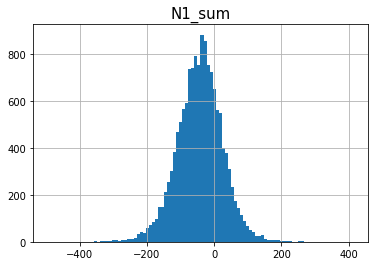

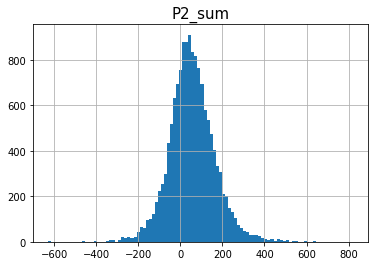

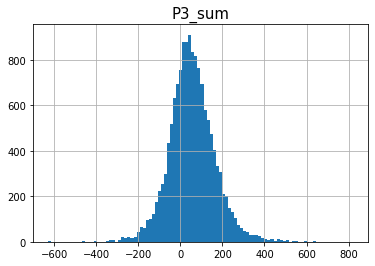

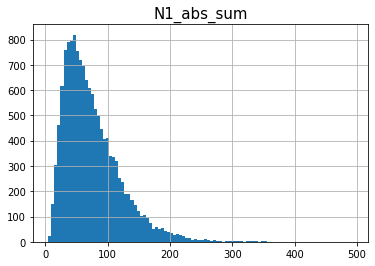

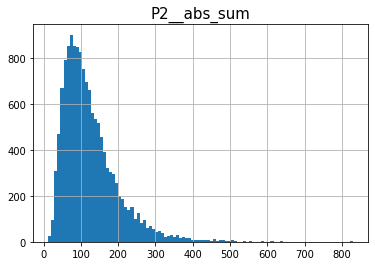

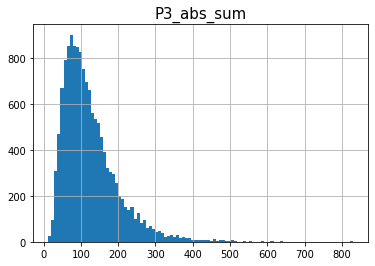

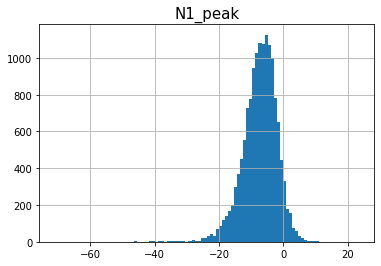

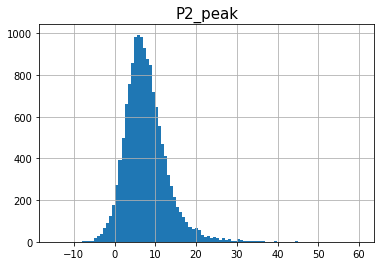

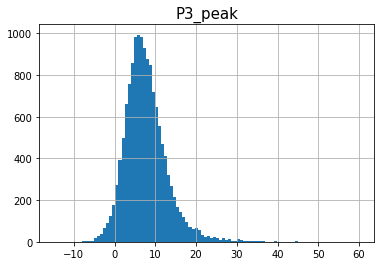

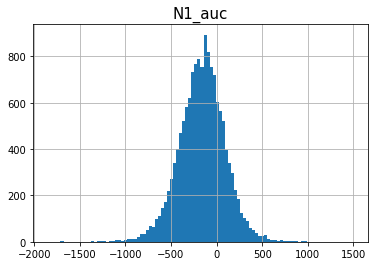

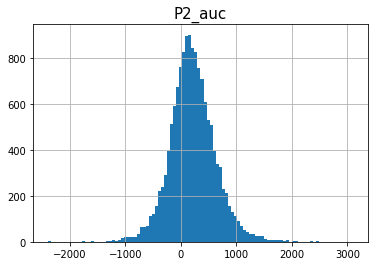

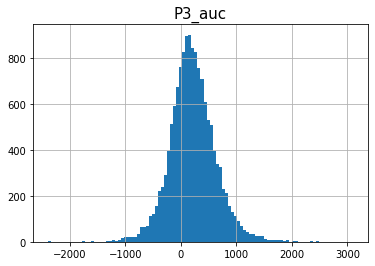

In [100]:
for sc in df_val.columns:
    df[sc].hist(bins=100)
    plt.title(sc, size=15)
    plt.show()

In [102]:
predictors = ['N1_sum', 'P2_sum', 'P3_sum','N1_peak', 'P2_peak', 'P3_peak']

In [103]:
X = df.drop(['id','group'],1)[predictors]
y = df['group']
# remove empty trials
X = X[~(df_val.isnull().all(axis=1))]
y = y[~(df_val.isnull().all(axis=1))]
# convert target categories to int
y = y.map({'Control':0, 'ASD':1})

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=770)

In [106]:
log_reg = LogisticRegression(solver='liblinear',max_iter=500)
start = time.clock()
model = log_reg.fit(X_train,y_train)
end = time.clock()
print(f'time{end-start}')

time0.050979400000016994


In [107]:
print(f'train acc: {(model.predict(X_train) == y_train).sum()/len(y_train)}')
print(f'test acc: {(model.predict(X_test) == y_test).sum()/len(y_test)}')

train acc: 0.6037355313924938
test acc: 0.582953349701859


In [138]:
scaler = StandardScaler().fit(df_val[~(df_val.isnull().all(axis=1))])

In [139]:
scaled_data = scaler.transform(df_val[~(df_val.isnull().all(axis=1))])

In [141]:
pca = PCA(n_components=2)
red_model = pca.fit(scaled_data)

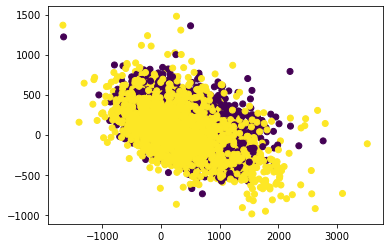

In [142]:
red_data = red_model.transform(df_val[~(df_val.isnull().all(axis=1))])
plt.scatter(red_data[:,0], red_data[:,1], c=y)
plt.show()

In [152]:
kmeans = KMeans(n_clusters=2, random_state=770).fit(red_data)

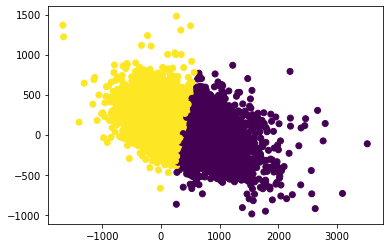

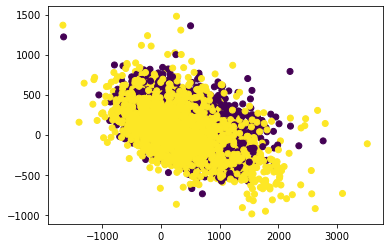

In [159]:
plt.scatter(x=red_data[:,0], y=red_data[:,1], c=kmeans.labels_)
plt.show()

plt.scatter(x=red_data[:,0], y=red_data[:,1], c=y)
plt.show()